In [17]:
import pandas as pd
gold_data = pd.read_csv('C:/Users/user/OneDrive/Desktop/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [19]:
gold_data.corr()['GLD'].sort_values(ascending=False)

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64

In [20]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [22]:
#Training the Algorithm
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [23]:
test_data_prediction = regressor.predict(X_test)

# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893122071158623


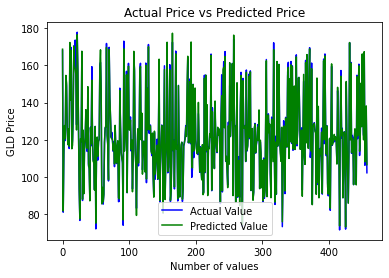

In [24]:
import matplotlib.pyplot as plt

Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')

plt.legend()
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [27]:
predictions=lm.predict(X_test)

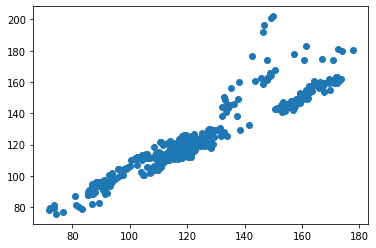

In [28]:
plt.scatter(Y_test,predictions)

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(Y_test,predictions)
print('r2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(Y_test,predictions))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(Y_test,predictions)))

r2 socre is 0.8657886565869236
mean_sqrd_error is== 70.78890079721533
root_mean_squared error of is== 8.413614015226473
